In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# DEKOHERENCJA

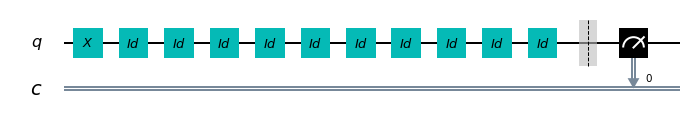

In [19]:
circ = QuantumCircuit(1,1)
circ.x(0)
for i in range(10):
    circ.iden(0)
circ.barrier(0)
circ.measure(0,0)
circ.draw()


In [37]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

In [36]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

Credentials are already in use. The existing account in the session will be replaced.


In [31]:
backend = provider.get_backend('ibmq_london')

In [32]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


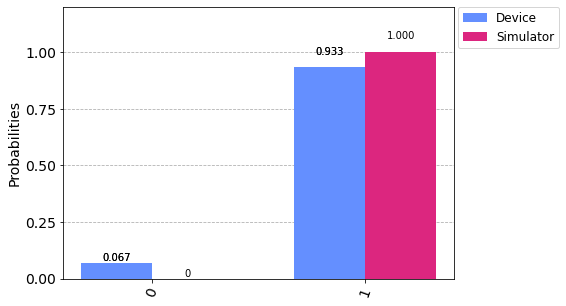

In [38]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

# 6% uruchomień daje wynik 0